# Lines, Scatters and Bars

## Instructions

In this lesson, you worked with line charts, scatterplots, and bar charts to show interesting facts about this dataset. In this assignment, dig deeper into the dataset to discover a fact about a given type of bird. For example, create a notebook visualizing all the interesting data you can uncover about Snow Geese. Use the three plots mentioned above to tell a story in your notebook.

## Rubric

Exemplary | Adequate | Needs Improvement
--- | --- | -- |
A notebook is presented with good annotations, solid storytelling, and attractive graphs | The notebook is missing one of these elements | The notebook is missing two of these elements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
birds = pd.read_csv('../../data/birds.csv')
birds.sample(5)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
283,Bank swallow,Riparia riparia,Swallows,Passeriformes,Hirundinidae,Riparia,LC,12.0,14.0,10.2,18.8,25.0,33.0
325,European starling,Sturnus vulgaris,Starlings,Passeriformes,Sturnidae,Sturnus,LC,19.0,23.0,58.0,101.0,31.0,44.0
225,Long-eared owl,Asio otus,Owls,Strigiformes,Strigidae,Asio,LC,31.0,40.0,160.0,435.0,86.0,102.0
315,Hermit thrush,Catharus guttatus,Thrushes/Allies,Passeriformes,Turdidae,Catharus,LC,15.0,18.0,18.0,37.0,25.0,30.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0


In [2]:
# fix those 2 or 4 outliers
print(birds.loc[[209]])
print(birds.loc[[247]])
birds['MaxWingspan'][209] = birds['MaxWingspan'][209]/10
birds['MinWingspan'][209] = birds['MinWingspan'][209]/10
birds['MaxWingspan'][247] = birds['MaxWingspan'][247]/10
birds['MinWingspan'][247] = birds['MinWingspan'][247]/10
print(birds.loc[[209]])
print(birds.loc[[247]])

           Name            ScientificName      Category            Order   
209  Bald eagle  Haliaeetus leucocephalus  Hawks/Eagles  Accipitriformes  \

           Family       Genus ConservationStatus  MinLength  MaxLength   
209  Accipitridae  Haliaeetus                 LC       70.0      102.0  \

     MinBodyMass  MaxBodyMass  MinWingspan  MaxWingspan  
209       3000.0       6300.0       1800.0       2300.0  
               Name   ScientificName            Category         Order   
247  Prairie falcon  Falco mexicanus  Falcons /Caracaras  Falconformes  \

         Family  Genus ConservationStatus  MinLength  MaxLength  MinBodyMass   
247  Falconidae  Falco                 LC       37.0       45.0        500.0  \

     MaxBodyMass  MinWingspan  MaxWingspan  
247        970.0       1100.0       1100.0  
           Name            ScientificName      Category            Order   
209  Bald eagle  Haliaeetus leucocephalus  Hawks/Eagles  Accipitriformes  \

           Family       Genus

/tmp/ipykernel_129/4070454546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds['MaxWingspan'][209] = birds['MaxWingspan'][209]/10
/tmp/ipykernel_129/4070454546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds['MinWingspan'][209] = birds['MinWingspan'][209]/10
/tmp/ipykernel_129/4070454546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birds['MaxWingspan'][247] = birds['MaxWingspan'][247]/10
/tmp/ipykernel_129/407

In [3]:
# okay let's learn about the Vesper sparrow, row 365
birds.loc[[365]]

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
365,Vesper sparrow,Pooecetes gramineus,New World sparrows,Passeriformes,Passerellidae,Pooecetes,LC,13.0,16.0,20.0,28.0,24.0,24.0


## Quantitative Values
first, let's compare the it's length, body mass, and wingspan with the mean and median of those values for all the birds.<br>

I will find said value and place them in some arrays (series? lists?).

In [4]:
atts = birds.columns.tolist()
del atts[0:7]
atts

['MinLength',
 'MaxLength',
 'MinBodyMass',
 'MaxBodyMass',
 'MinWingspan',
 'MaxWingspan']

#### Figure out how to find mean and median

In [5]:
means = []
for item in atts:
    means.append(birds.loc[:, item].mean())
means

[28.53668171557562,
 35.44198645598194,
 327.9382618510158,
 667.0097516930023,
 52.66625282167043,
 60.61704288939052]

In [6]:
medians = []
for item in atts:
    medians.append(birds.loc[:, item].median())
medians

[20.5, 25.0, 55.0, 89.0, 38.0, 42.0]

might as well just make a list for these Vesper sparrow attributes too.

In [7]:
VesSpar = []
for item in atts:
    VesSpar.append(birds.loc[365, item])
VesSpar

[13.0, 16.0, 20.0, 28.0, 24.0, 24.0]

#### Combine all that information into a dict

In [8]:
attvals = dict({'mean': means, 'vs': VesSpar, 'median': medians})
attvals

{'mean': [28.53668171557562,
  35.44198645598194,
  327.9382618510158,
  667.0097516930023,
  52.66625282167043,
  60.61704288939052],
 'vs': [13.0, 16.0, 20.0, 28.0, 24.0, 24.0],
 'median': [20.5, 25.0, 55.0, 89.0, 38.0, 42.0]}

#### plot!

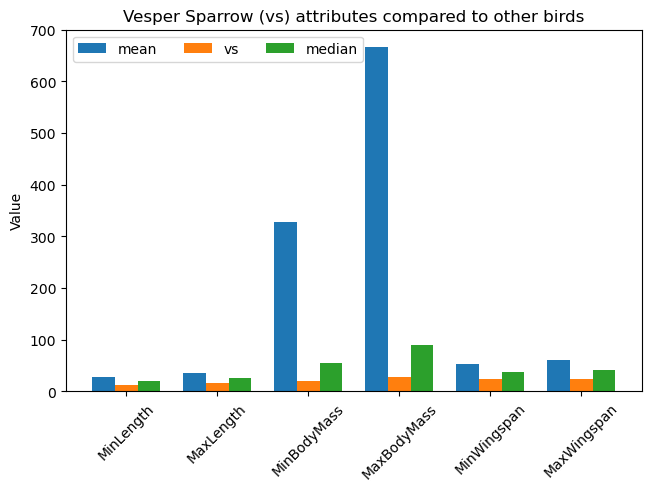

In [9]:
# all from here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(atts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in attvals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3) #labels make it too cluttered
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Vesper Sparrow (vs) attributes compared to other birds')
ax.set_xticks(x + width, atts)
plt.xticks(rotation=45)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 55)

plt.show()

### Cool! How about just its category?
It's clear it is below average, sometimes drastically below average. So maybe clearer results can be obtained by using only the birds in the ```New World sparrows```.

In [10]:
# Since we're creating a new df anyways, let's delete the columns we are not using
birds_qn = birds.drop(birds.columns[[1, 3, 4, 5, 6]], axis=1)
birds_qn.sample(5)

,Name,Category,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
180,Double-crested cormorant,Cormorants/Shags,70.0,90.0,1200.0,2500.0,114.0,123.0
268,Northern shrike,Shrikes,23.0,24.0,56.0,79.0,30.0,35.0
295,Pygmy nuthatch,Nuthatches,9.0,11.0,9.0,11.0,19.7,19.7
22,Northern pintail,Ducks/Geese/Waterfowl,51.0,76.0,450.0,1360.0,80.0,95.0
179,Magnificent frigatebird,Frigatebirds,89.0,114.0,1100.0,1590.0,217.0,244.0


In [11]:
# so let's create a new dataframe with only birds in New World sparrows, from here
#https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-and-then-filling-it
# we're creating a list first
nwspar_list = []
for index, row in birds_qn.iterrows():
    if (row['Category'] == 'New World sparrows'):
        nwspar_list.append(birds_qn.loc[[index]].values.flatten().tolist())
nwspar_list[:5]

[['Grasshopper sparrow',
  'New World sparrows',
  10.0,
  14.0,
  13.8,
  28.4,
  17.5,
  17.5],
 ['Black-throated sparrow',
  'New World sparrows',
  12.0,
  14.0,
  11.0,
  15.0,
  19.5,
  19.5],
 ['Lark sparrow', 'New World sparrows', 15.0, 17.0, 24.0, 33.0, 28.0, 28.0],
 ['Lark bunting', 'New World sparrows', 14.0, 18.0, 35.3, 41.3, 25.0, 28.0],
 ['Chipping sparrow',
  'New World sparrows',
  12.0,
  15.0,
  11.0,
  16.0,
  21.0,
  21.0]]

In [12]:
# check if I did it right
print(birds['Category'].value_counts())
print(birds_qn['Category'].value_counts())
len(nwspar_list)

Category
Ducks/Geese/Waterfowl              45
New World warblers                 41
Sandpipers/Allies                  34
Gulls/Terns/Skimmers               28
New World sparrows                 26
Tyrant flycatchers                 19
Hawks/Eagles                       15
Troupials/Allies                   14
Finches/Euphonias/Allies           13
Woodpeckers                        12
Thrushes/Allies                    11
Owls                               11
Herons/Egrets/Bitterns             11
Cardinals/Allies                   11
Pheasants/Grouse/Allies             9
Pigeons/Doves                       8
Rails/Gallinules/Coots              8
Hummingbirds                        7
Plovers/Lapwings                    7
Wrens                               7
Swallows                            7
Vireos/Shrike-babblers/Erpornis     7
Grebes                              6
Crows/Jays/Magpies                  6
Falcons /Caracaras                  6
Longspurs/Snow buntings             5
Moc

26

In [13]:
# All 26! Okay let's create the df
nwspar = pd.DataFrame(nwspar_list)
nwspar.columns = birds_qn.columns #rename columns (they are just basic numbers rn)
nwspar.head()

,Name,Category,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Grasshopper sparrow,New World sparrows,10.0,14.0,13.8,28.4,17.5,17.5
1,Black-throated sparrow,New World sparrows,12.0,14.0,11.0,15.0,19.5,19.5
2,Lark sparrow,New World sparrows,15.0,17.0,24.0,33.0,28.0,28.0
3,Lark bunting,New World sparrows,14.0,18.0,35.3,41.3,25.0,28.0
4,Chipping sparrow,New World sparrows,12.0,15.0,11.0,16.0,21.0,21.0


In [41]:
# alr, just for later let's find the index of the vesper sparrow
# https://www.projectpro.io/recipes/search-value-within-pandas-dataframe-column
nwspar.loc[nwspar['Name'].str.contains('Vesper')]

# index 15

,Name,Category,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
15,Vesper sparrow,New World sparrows,13.0,16.0,20.0,28.0,24.0,24.0


#### Before comparing with average, let's just look at it raw compared to the other birds in the category.

I will make scatter plots and line charts comparing min and max of Length, BodyMass, and Wingspan.

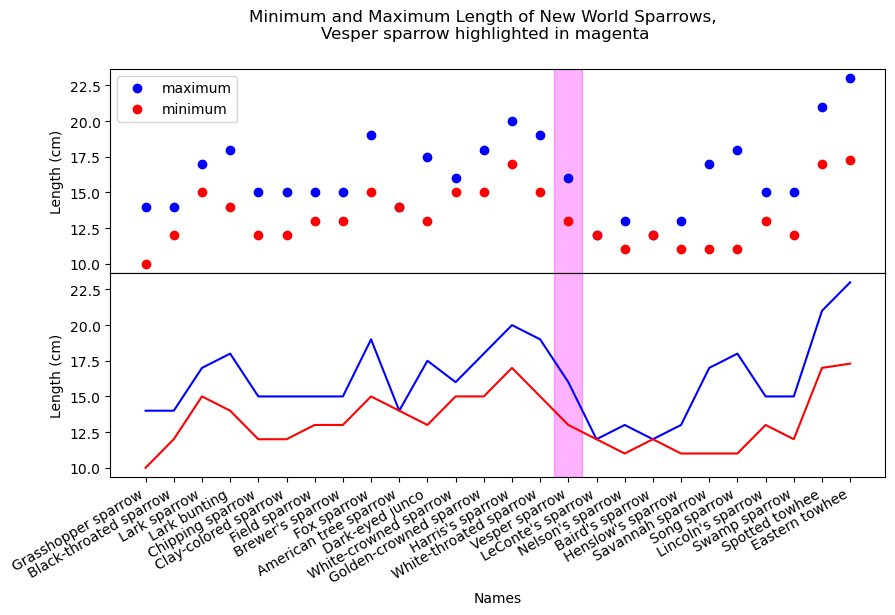

In [50]:
# LENGTH

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
x = nwspar['Name'] 
y1 = nwspar['MaxLength']
y2 = nwspar['MinLength']

# make space between subplots zero (same data anyways)
fig.subplots_adjust(hspace=0)
# shared elements
fig.suptitle('Minimum and Maximum Length of New World Sparrows, \nVesper sparrow highlighted in magenta')
fig.autofmt_xdate() # pretty sure I'm not using this as intended, but this is 
                    #where I found it: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-alpha-py
axs[1].set_xlabel('Names')

# scatterplot
# https://stackoverflow.com/questions/8270981/how-to-highlight-specific-x-value-ranges
#^to highlight vesper sparrow

axs[0].set_ylabel('Length (cm)')

trend1, = axs[0].plot(x, y1, 'bo', label = "maximum")
trend2, = axs[0].plot(x, y2, 'ro', label = "minimum")

axs[0].legend(handles=[trend1, trend2])

axs[0].axvspan(14.5, 15.5, color='magenta', alpha=0.3)

# line chart
axs[1].set_ylabel('Length (cm)')

#I think the first legend also explains this plot so I won't make another
axs[1].plot(x, y1, 'blue', label = "maximum")
axs[1].plot(x, y2, 'red', label = "minimum")

axs[1].axvspan(14.5, 15.5, color='magenta', alpha=0.3)


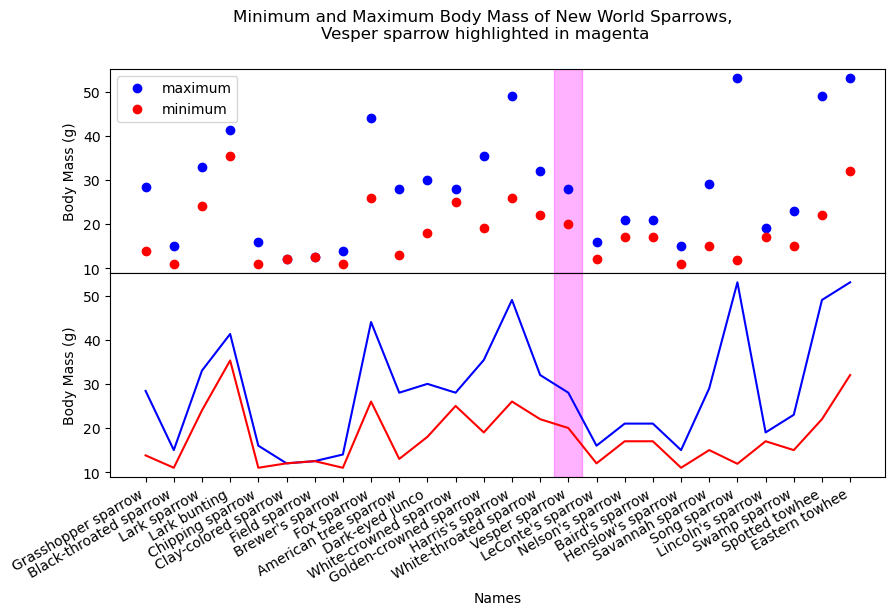

In [51]:
# BODY MASS

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
x = nwspar['Name'] 
y1 = nwspar['MaxBodyMass']
y2 = nwspar['MinBodyMass']

# make space between subplots zero (same data anyways)
fig.subplots_adjust(hspace=0)
# shared elements
fig.suptitle('Minimum and Maximum Body Mass of New World Sparrows, \nVesper sparrow highlighted in magenta')
fig.autofmt_xdate() # pretty sure I'm not using this as intended, but this is 
                    #where I found it: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-alpha-py
axs[1].set_xlabel('Names')

# scatterplot
# https://stackoverflow.com/questions/8270981/how-to-highlight-specific-x-value-ranges
#^to highlight vesper sparrow

axs[0].set_ylabel('Body Mass (g)')

trend1, = axs[0].plot(x, y1, 'bo', label = "maximum")
trend2, = axs[0].plot(x, y2, 'ro', label = "minimum")

axs[0].legend(handles=[trend1, trend2])

axs[0].axvspan(14.5, 15.5, color='magenta', alpha=0.3)

# line chart
axs[1].set_ylabel('Body Mass (g)')

#I think the first legend also explains this plot so I won't make another
axs[1].plot(x, y1, 'blue', label = "maximum")
axs[1].plot(x, y2, 'red', label = "minimum")

axs[1].axvspan(14.5, 15.5, color='magenta', alpha=0.3)


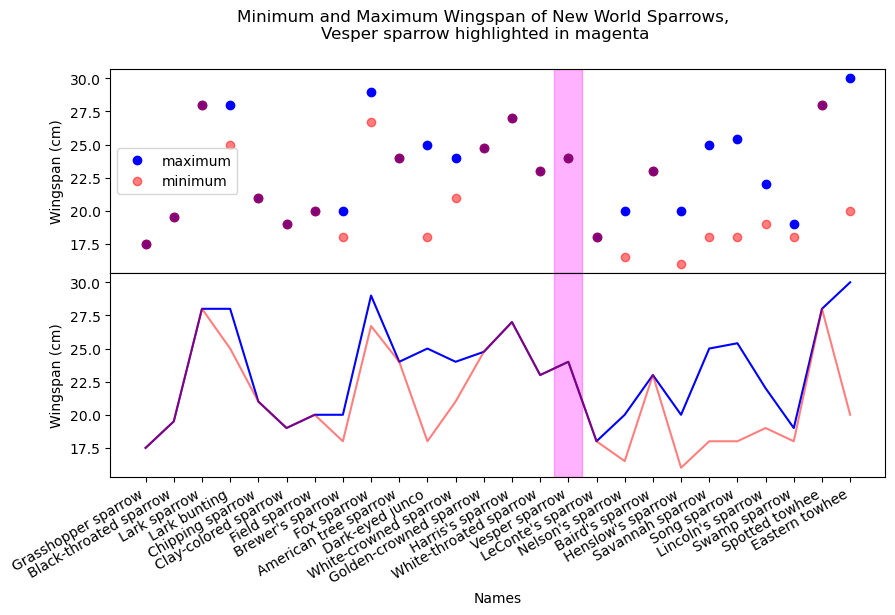

In [58]:
# Wingspan

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
x = nwspar['Name'] 
y1 = nwspar['MaxWingspan']
y2 = nwspar['MinWingspan']

# make space between subplots zero (same data anyways)
fig.subplots_adjust(hspace=0)
# shared elements
fig.suptitle('Minimum and Maximum Wingspan of New World Sparrows, \nVesper sparrow highlighted in magenta')
fig.autofmt_xdate() # pretty sure I'm not using this as intended, but this is 
                    #where I found it: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html#sphx-glr-gallery-lines-bars-and-markers-fill-between-alpha-py

axs[1].set_xlabel('Names')

# scatterplot
# https://stackoverflow.com/questions/8270981/how-to-highlight-specific-x-value-ranges
#^to highlight vesper sparrow

axs[0].set_ylabel('Wingspan (cm)')

trend1, = axs[0].plot(x, y1, 'bo', label = "maximum")
trend2, = axs[0].plot(x, y2, 'ro', alpha = 0.5, label = "minimum")

axs[0].legend(handles=[trend1, trend2])

axs[0].axvspan(14.5, 15.5, color='magenta', alpha=0.3)

# line chart
axs[1].set_ylabel('Wingspan (cm)')

#I think the first legend also explains this plot so I won't make another
axs[1].plot(x, y1, 'blue', label = "maximum")
axs[1].plot(x, y2, 'red', alpha = 0.5, label = "minimum")

axs[1].axvspan(14.5, 15.5, color='magenta', alpha=0.3)

#### mean, median, and other info
Back to the bar chart, now only this category!

In [67]:
# groups
atts = nwspar.columns.tolist()
del atts[0:2]
atts
# I am aware there is no change of this from last time, but let me just practice

['MinLength',
 'MaxLength',
 'MinBodyMass',
 'MaxBodyMass',
 'MinWingspan',
 'MaxWingspan']

In [68]:
# mean
means = []
for item in atts:
    means.append(nwspar.loc[:, item].mean())
means

[13.28076923076923,
 16.21153846153846,
 18.057692307692307,
 28.676923076923078,
 21.190384615384616,
 23.236538461538462]

In [69]:
# median
medians = []
for item in atts:
    medians.append(nwspar.loc[:, item].median())
medians

[13.0, 15.5, 17.0, 28.0, 20.0, 23.5]

Not gonna find vesper sparrow attributes again because that really is the exact same code, and any changes will just be big unecessary extra work. 

#### Combine all information into a dict

In [70]:
attvals = dict({'mean': means, 'vs': VesSpar, 'median': medians})
attvals

{'mean': [13.28076923076923,
  16.21153846153846,
  18.057692307692307,
  28.676923076923078,
  21.190384615384616,
  23.236538461538462],
 'vs': [13.0, 16.0, 20.0, 28.0, 24.0, 24.0],
 'median': [13.0, 15.5, 17.0, 28.0, 20.0, 23.5]}

#### plot!

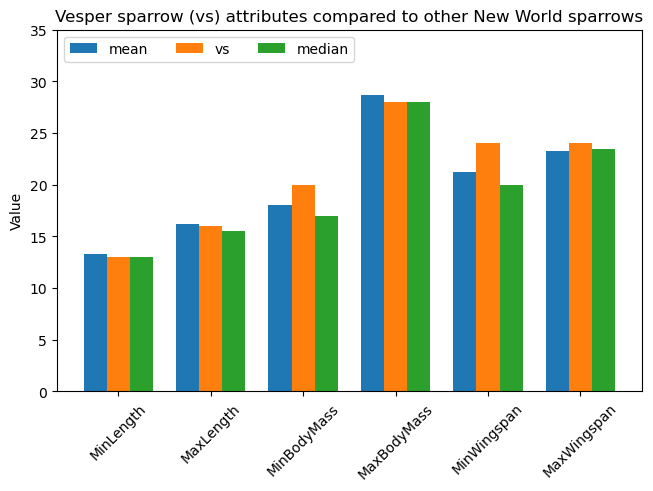

In [71]:
# all from here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

x = np.arange(len(atts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in attvals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3) # removed labels bc too cluttered
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Vesper sparrow (vs) attributes compared to other New World sparrows')
ax.set_xticks(x + width, atts)
plt.xticks(rotation=45)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 35)

plt.show()

conclusions: It seems their length is pretty average, though a bit on the smaller side, while body mass is also kinda average, but a bit on the larger size. Wingspans is the only area with conclusive results, with it being larger than the category's on average. 

## Qualitative Values

In [72]:
# let's take a look at the dataframe again
birds.sample(5)

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
108,Hudsonian godwit,Limosa haemastica,Sandpipers/Allies,Charadriiformes,Scolopacidae,Limosa,LC,37.0,42.0,300.0,300.0,74.0,74.0
28,Greater scaup,Aythya marila,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Aythya,LC,39.0,56.0,726.0,1360.0,71.0,84.0
282,Horned lark,Eremophila alpestris,Larks,Passeriformes,Alaudidae,Eremophila,LC,16.0,20.0,28.0,48.0,30.0,34.0
283,Bank swallow,Riparia riparia,Swallows,Passeriformes,Hirundinidae,Riparia,LC,12.0,14.0,10.2,18.8,25.0,33.0
398,Prothonotary warbler,Protonotaria citrea,New World warblers,Passeriformes,Parulidae,Protonotaria,LC,13.0,13.0,12.5,12.5,22.0,22.0


In [73]:
# and the vesper sparrow, because we are still focused on that
birds.loc[[365]]

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
365,Vesper sparrow,Pooecetes gramineus,New World sparrows,Passeriformes,Passerellidae,Pooecetes,LC,13.0,16.0,20.0,28.0,24.0,24.0


Okay, so there is a vague idea of doing some kind of nomenclature thing where there can be a flow chart from order of family down to species (fun time data cleaning scientific name!) or genus, so we can see how closely "related" the Vesper sparrow is to other birds. 

In [74]:
birds['Order'].value_counts()

Order
Passeriformes        195
Charadriiformes       78
Anseriformes          45
Pelecaniformes        17
Accipitriformes       16
Piciformes            12
Strigiformes          12
Gruiformes            10
Galliformes           10
Apodiformes            9
Columbiformes          8
Podicipediformes       6
Falconformes           6
Caprimulgiformes       4
Gaviiformes            4
Suliformes             3
Cuculiformes           3
Cathartiformes         2
Coraciiformes          1
Ciconiiformes          1
Procellariiformes      1
Name: count, dtype: int64

Okay 195 of order ```Passeriformes``` isn't bad, create a new dataframe to hold just that Order to see if I can go all the way to genus or stop at family (195 is still a lot). Also because if we're only working with ```Passeriformes```, then why not.

In [75]:
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
Passeriformes = birds[birds.Order == 'Passeriformes']

# delete unecessary columns
Passeriformes = Passeriformes.drop(Passeriformes.columns[[2, 6, 7, 8, 9, 10, 11, 12]], axis=1)

Passeriformes.sample(5)

,Name,ScientificName,Order,Family,Genus
434,Western tanager,Piranga ludoviciana,Passeriformes,Cardinalidae,Piranga
282,Horned lark,Eremophila alpestris,Passeriformes,Alaudidae,Eremophila
284,Tree swallow,Tachycineta bicolor,Passeriformes,Hirundinidae,Tachycineta
423,Yellow-throated warbler,Setophaga dominica,Passeriformes,Parulidae,Setophaga
317,Fieldfare,Turdus pilaris,Passeriformes,Turdidae,Turdus


In [76]:
Passeriformes['Family'].value_counts()

Family
Parulidae        41
Passerellidae    26
Tyrannidae       19
Icteridae        15
Fringillidae     13
Turdidae         11
Cardinalidae     11
Troglodytidae     7
Vireonidae        7
Hirundinidae      7
Corvidae          6
Calcariidae       5
Mimidae           5
Sittidae          3
Paridae           3
Regulidae         2
Laniidae          2
Bombycillidae     2
Passeridae        2
Motacillidae      2
Alaudidae         1
Sturnidae         1
Certhiidae        1
Cinclidae         1
Polioptilidae     1
Muscicapidae      1
Name: count, dtype: int64

find Vesper sparrow

In [77]:
Passeriformes.loc[Passeriformes['Name'].str.contains('Vesper')]

,Name,ScientificName,Order,Family,Genus
365,Vesper sparrow,Pooecetes gramineus,Passeriformes,Passerellidae,Pooecetes


I will try making a Sankey diagram with just ```Order``` to ```Family```. It has to be with plotly then.
Remember to install it first:
```bash
pip install plotly==5.20.0
```

In [78]:
import plotly.express as px

test with the sample code to see if I can do the html trick

In [79]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.write_html('egSankey.html', auto_open=True)

yes! it worked. Okay, on to arranging the data

In [80]:
# LABEL

# Order
labels = ["Passeriformes"]
labels

# Family
families = Passeriformes['Family'].unique()
families

labels.extend(families)
labels

['Passeriformes',
 'Tyrannidae',
 'Laniidae',
 'Vireonidae',
 'Corvidae',
 'Alaudidae',
 'Hirundinidae',
 'Paridae',
 'Sittidae',
 'Certhiidae',
 'Troglodytidae',
 'Polioptilidae',
 'Cinclidae',
 'Regulidae',
 'Muscicapidae',
 'Turdidae',
 'Mimidae',
 'Sturnidae',
 'Bombycillidae',
 'Passeridae',
 'Motacillidae',
 'Fringillidae',
 'Calcariidae',
 'Passerellidae',
 'Icteridae',
 'Parulidae',
 'Cardinalidae']

In [81]:
# INTERLUDE
# figure out if I can get value_counts to match up with this Family order
Passeriformes['Family'].value_counts(sort=False)
# YESSSSS

Family
Tyrannidae       19
Laniidae          2
Vireonidae        7
Corvidae          6
Alaudidae         1
Hirundinidae      7
Paridae           3
Sittidae          3
Certhiidae        1
Troglodytidae     7
Polioptilidae     1
Cinclidae         1
Regulidae         2
Muscicapidae      1
Turdidae         11
Mimidae           5
Sturnidae         1
Bombycillidae     2
Passeridae        2
Motacillidae      2
Fringillidae     13
Calcariidae       5
Passerellidae    26
Icteridae        15
Parulidae        41
Cardinalidae     11
Name: count, dtype: int64

In [82]:
# SOURCE

# find length of families array to figure out # of families bc that's basically # of links
len(families) # = 26

# all start from Passeriformes, first item in the labels list, so zero index
# https://note.nkmk.me/en/python-list-initialize/
sources = [0] * len(families)
sources

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [83]:
# TARGET

# one each Family
targets = [1]
for i in range (2, 27):
    targets.append(i)
targets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [84]:
# VALUE

# these are the value_counts, remember to coordinate order!
values = Passeriformes['Family'].value_counts(sort=False).tolist()
values

[19,
 2,
 7,
 6,
 1,
 7,
 3,
 3,
 1,
 7,
 1,
 1,
 2,
 1,
 11,
 5,
 1,
 2,
 2,
 2,
 13,
 5,
 26,
 15,
 41,
 11]

plot!

In [85]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Passeriformes to various Families", font_size=10)
fig.write_html('PasseriformesFamilies.html', auto_open=True)

That wasn't too bad! I think I can add genus to this!

In [86]:
Passeriformes.loc[[365]]

,Name,ScientificName,Order,Family,Genus
365,Vesper sparrow,Pooecetes gramineus,Passeriformes,Passerellidae,Pooecetes


Okay so the plan is to make this map specific to the ```Vesper sparrow```, that just means I will display all the genus for the Family ```Passeredllidae```, but not for any other Family. This means less work, yes, but there are also so many genus it will just make it easier to look at and follow.

In [87]:
# make new df
Passerellidae = Passeriformes[Passeriformes.Family == 'Passerellidae']
Passerellidae.sample(5)

,Name,ScientificName,Order,Family,Genus
350,Grasshopper sparrow,Ammodramus savannarum,Passeriformes,Passerellidae,Ammodramus
357,Brewer's sparrow,Spizella breweri,Passeriformes,Passerellidae,Spizella
361,White-crowned sparrow,Zonotrichia leucophrys,Passeriformes,Passerellidae,Zonotrichia
358,Fox sparrow,Passerella iliaca,Passeriformes,Passerellidae,Passerella
369,Henslow's sparrow,Centronyx henslowii,Passeriformes,Passerellidae,Centronyx


In [104]:
# see all genus
Passerellidae['Genus'].value_counts(sort=False)

Genus
Ammodramus      1
Amphispiza      1
Chondestes      1
Calamospiza     1
Spizella        4
Passerella      1
Spizelloides    1
Junco           1
Zonotrichia     4
Pooecetes       1
Ammospiza       2
Centronyx       2
Passerculus     1
Melospiza       3
Pipilo          2
Name: count, dtype: int64

The vesper sparrow is of genus, ```Pooecetes```, and the only bird of that genus in this dataset.
- still, I think it'd be beneficial to make another layer to just show its scientific name. But back to that another time. <br>

So, on to arranging data!

In [105]:
# LABEL

# Order
labels = ["Passeriformes"]

# Family
families = Passeriformes['Family'].unique()

# Genus
genus = Passerellidae['Genus'].unique()

labels.extend(families)
labels.extend(genus)
labels

['Passeriformes',
 'Tyrannidae',
 'Laniidae',
 'Vireonidae',
 'Corvidae',
 'Alaudidae',
 'Hirundinidae',
 'Paridae',
 'Sittidae',
 'Certhiidae',
 'Troglodytidae',
 'Polioptilidae',
 'Cinclidae',
 'Regulidae',
 'Muscicapidae',
 'Turdidae',
 'Mimidae',
 'Sturnidae',
 'Bombycillidae',
 'Passeridae',
 'Motacillidae',
 'Fringillidae',
 'Calcariidae',
 'Passerellidae',
 'Icteridae',
 'Parulidae',
 'Cardinalidae',
 'Ammodramus',
 'Amphispiza',
 'Chondestes',
 'Calamospiza',
 'Spizella',
 'Passerella',
 'Spizelloides',
 'Junco',
 'Zonotrichia',
 'Pooecetes',
 'Ammospiza',
 'Centronyx',
 'Passerculus',
 'Melospiza',
 'Pipilo']

In [106]:
# SOURCE

# FIRST SET
# find length of families array to figure out # of families bc that's basically # of links
len(families) # = 26

# all start from Passeriformes, first item in the labels list, so zero index
# https://note.nkmk.me/en/python-list-initialize/
sources = [0] * len(families)
sources

# SECOND SET
# find which node Passerellidae is
labels.index('Passerellidae') # = 23

# find lenght of genus to find # of families to find # of links
len(genus) # = 15

# make 15 with start source at 23
sources2 = [labels.index('Passerellidae')] * len(genus)

# add to sources
sources.extend(sources2)
sources

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23]

In [107]:
# TARGET

# one each Family
targets = [1]
for i in range (2, 27):
    targets.append(i)
targets

# one each genus
for i in range (27, 27+len(genus)):
    targets.append(i)
targets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [108]:
# VALUE
# these are the value_counts, remember to coordinate order!

# families: 
values = Passeriformes['Family'].value_counts(sort=False).tolist()
values

# genus:
values2 = Passerellidae['Genus'].value_counts(sort=False).tolist()
values2

# combine:
values.extend(values2)
values

[19,
 2,
 7,
 6,
 1,
 7,
 3,
 3,
 1,
 7,
 1,
 1,
 2,
 1,
 11,
 5,
 1,
 2,
 2,
 2,
 13,
 5,
 26,
 15,
 41,
 11,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 3,
 2]

In [110]:
# PLOT

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "green"
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Passeriformes to Passerellidae and other families. Passerellidae to various genus", font_size=10)
fig.write_html('PasseriformesPasserellidaeGenus.html', auto_open=True)

Looking good! And it *does* make ```Passerellidae``` stick out a bit, which is actually good because then I can leave colour to deal with another day. Lastly, let me just add the scientific name!
- It is a bit confusing where it looks as though the other Families are on the same "level" as the Genus, but I hope the title clarifies.

In [111]:
Passerellidae.loc[[365]]

,Name,ScientificName,Order,Family,Genus
365,Vesper sparrow,Pooecetes gramineus,Passeriformes,Passerellidae,Pooecetes


In [117]:
# LABEL

# Scientific Name
sciname = ["Pooecetes gramineus"]

labels.extend(sciname)
labels

# SOURCE

# THIRD SET
# find which node Pooecetes is
labels.index('Pooecetes') # = 36

# make just the one with source at 36
sources3 = [labels.index('Pooecetes')]

sources.extend(sources3)
sources

# TARGET

targets.append(42)
targets

# VALUES

values3 = [1]

# combine:
values.extend(values3)
values

[19,
 2,
 7,
 6,
 1,
 7,
 3,
 3,
 1,
 7,
 1,
 1,
 2,
 1,
 11,
 5,
 1,
 2,
 2,
 2,
 13,
 5,
 26,
 15,
 41,
 11,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 1,
 3,
 2,
 1]

In [122]:
# PLOT

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "red"
    ),
    link = dict(
      source = sources, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Nomenclature of Pooecetes gramineus (vesper sparrow) from Order to Scientific Name.", font_size=10)
fig.write_html('PasseriformesPasserellidaeGenus.html', auto_open=True)

And that's all about vesper sparrows!

TODO (extension)
- highlight (with a diff colour) the Vesper Sparrow path